### Methodology
#### The expected content of the notebook:
    - Detection of time series changes in facial action units

#### Data - data frame of facial action units of James (using OpenFace for windows)

In [1]:
import sys
import os
import warnings

import pandas as pd
from pandas.io.json import json_normalize #package for flattening json in pandas df
from ast import literal_eval
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import CRD_functions as crd

In [2]:
# ========================
# PERSONAL PREFERENCES
# Set pandas output preferences
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
# Set seaborn plot style
plt.style.use('seaborn')
# ========================

In [3]:
jms_facs = pd.read_csv("FACs_Test.csv")

In [4]:
# select only the action units from the df
au_ls = ['frame', ' face_id', #' timestamp', 
         ' AU01_r', ' AU02_r', ' AU04_r', ' AU05_r', ' AU06_r', ' AU07_r', ' AU09_r', ' AU10_r',
         ' AU12_r', ' AU14_r', ' AU15_r', ' AU17_r', ' AU20_r', ' AU23_r', ' AU25_r', ' AU26_r',
         ' AU45_r', ' AU01_c', ' AU02_c', ' AU04_c', ' AU05_c', ' AU06_c', ' AU07_c', ' AU09_c',
         ' AU10_c', ' AU12_c', ' AU14_c', ' AU15_c', ' AU17_c', ' AU20_c', ' AU23_c', ' AU25_c',
         ' AU26_c', ' AU28_c', ' AU45_c']
jms_au = jms_facs[au_ls]
#jms_facs.columns.tolist()

#### Select the timestamp, userID, and adaptiveCorrectionMoments columns and drop NAs

In [5]:
# sort data frame based on timestamp
jms_au = jms_au.sort_values(by=['frame'])

In [6]:
jms_au = jms_au[1:200]
jms_au.head()

,frame,face_id,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,AU10_c,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
1,2,0,0.0,0.0,0.77,0.0,0.44,0.41,0.33,1.09,0.0,0.70,0.41,0.71,0.36,0.21,0.08,0.05,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,0,0.0,0.0,0.66,0.0,0.60,0.41,0.37,1.23,0.0,0.71,0.58,1.11,0.50,0.08,0.31,0.05,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0.0,0.0,0.46,0.0,0.53,0.09,0.30,1.27,0.0,0.63,0.37,0.99,0.49,0.00,0.44,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0,0.0,0.0,0.15,0.0,0.34,0.00,0.44,1.09,0.0,0.78,0.35,1.09,0.48,0.00,0.53,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5,6,0,0.0,0.0,0.11,0.0,0.23,0.14,0.55,1.25,0.0,0.60,0.28,1.01,0.34,0.00,0.32,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#(df, win, xmin, xmax, col_first, col_last):
  # df = data frame
  # win = window size
  # xmin = scalar number
  # xmax = scalar number
  # col_first = number
  # col_last = number
jms_au_du=crd.DC_D_p(jms_au, win=14, xmin=0, xmax=5, col_first=1, col_last=len(jms_au.columns.tolist()))
jms_au_fi=crd.DC_F_p(jms_au, win=14, xmin=0, xmax=5, col_first=1, col_last=len(jms_au.columns.tolist()))
jms_au_dyn_comp=jms_au_du*jms_au_fi
jms_au_dyn_compT=jms_au_dyn_comp.T
data_compdf=jms_au_dyn_comp

In [8]:
jms_au.iloc[:, 3:].columns.tolist()
len(jms_au.columns.tolist())
data_compdf.head(2)
#acm_df_40.iloc[:, 3:len(acm_df_40.columns.tolist())].columns.tolist()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
mmscaler = MinMaxScaler()
data_compdf_scal = pd.DataFrame(mmscaler.fit_transform(data_compdf), 
                                columns = jms_au.iloc[:, 0:len(jms_au.columns.tolist())].columns.tolist(), 
                               index=jms_au["frame"])

data_compdf_scal.insert(loc=0, column="", value=np.nan)
#data_compdf_scal.to_csv("user_40_ACM.csv")

In [10]:
cmap_n = 12
crd.cmaps_options[cmap_n]
#crd.cmaps_options
#np.arange(len(data_compdf_scal))

'rainbow'

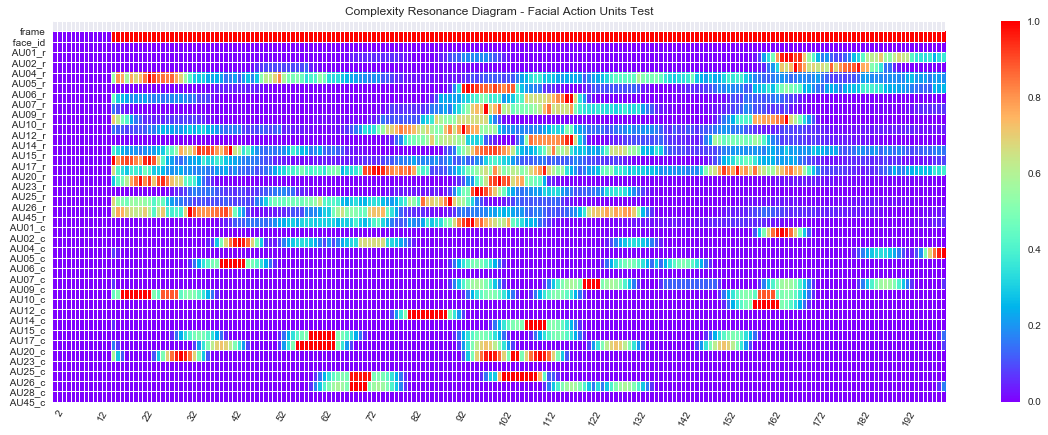

In [11]:
#plot the complexity resonance diagram
fig, ax = plt.subplots(figsize=(20,7))
#plot_comp = plt.imshow(np.flipud(data_compdf_scal.T), cmap=crd.cmaps_options[cmap_n])
plot_comp = plt.imshow(data_compdf_scal.T, cmap=crd.cmaps_options[cmap_n])
plt.gca().set_aspect(aspect='auto')

#set the color bar on the right, based on the values from the data
cbar = fig.colorbar(plot_comp)

#Show all ticks
ax.set_xticks(np.arange(0.5, len(data_compdf_scal)+0.5))
ax.set_yticks(np.arange(-0.5, len(list(data_compdf_scal))-0.5))
#and label them with the respective list entries
ax.set_xticklabels(list(data_compdf_scal.index))
ax.set_yticklabels(list(data_compdf_scal))
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=60, ha="right",
         rotation_mode="anchor")

n = 10  # Keeps every nth label
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

ax.set_title("Complexity Resonance Diagram - Facial Action Units Test")
plt.show()

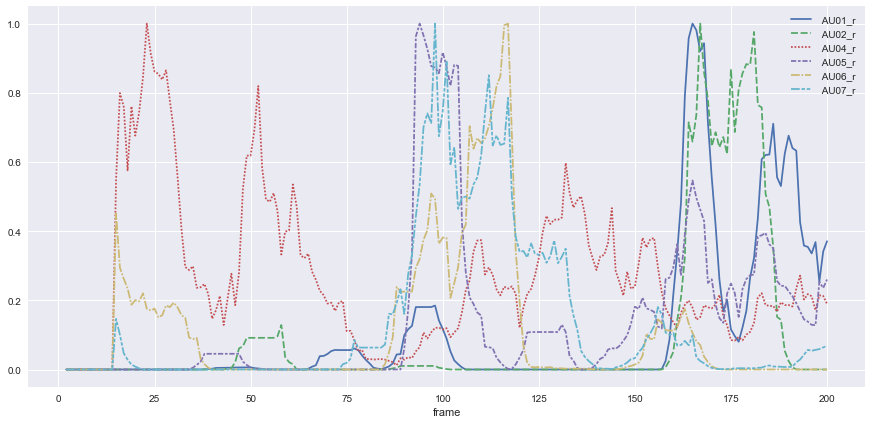

In [12]:
plt.figure(figsize=(15,7))
_ = sns.lineplot(data=data_compdf_scal.iloc[:, 3:9])

### Ts_levels different FACS

In [13]:
# Run the ts levels
#_ = plt.figure(figsize=(15,5))
show_plot=False
facs_au04_tl = crd.ts_levels_py(jms_au[" AU04_r"], max_depth=2, 
                                   min_samples_split=20, min_samples_leaf=1, plot=show_plot)
facs_au05_tl = crd.ts_levels_py(jms_au[" AU05_r"], max_depth=2, 
                                   min_samples_split=20, min_samples_leaf=1, plot=show_plot)

In [14]:
# add window_size (identifier column)
facs_au04_tl["var"] = "AU04_r"
facs_au05_tl["var"] = "AU05_r"

In [15]:
# concatenate all the window size dfs into one
facs_allaus_tl = pd.concat([facs_au04_tl, facs_au05_tl
                                ])

In [16]:
# convert the df to long format for plotting
facs_allaus_tl_m = facs_allaus_tl.melt(id_vars=["t_steps", "var"])

### Plot all of the FACS

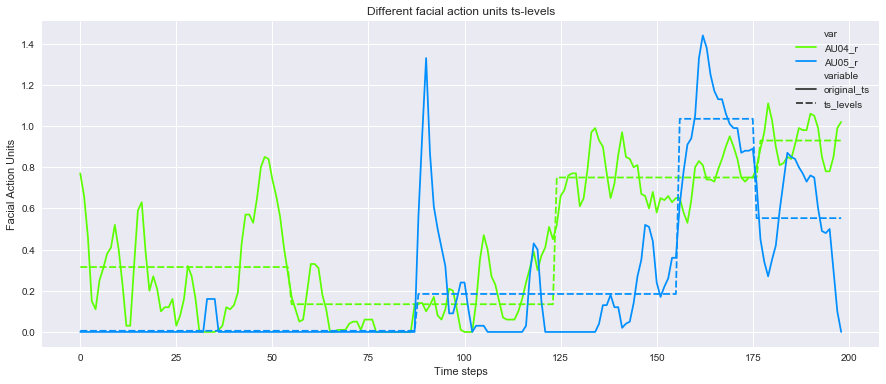

In [17]:
plt.figure(figsize=(15, 6))
ax = sns.lineplot(x="t_steps", y="value",
             hue="var", style="variable", palette="gist_rainbow",
             data=facs_allaus_tl_m)
_ = ax.set(xlabel='Time steps', ylabel='Facial Action Units', 
           title='Different facial action units ts-levels')